# 02.06 - Comparisons, Masks, and Boolean Logic

**Boolean masking** is the manipulation of values in an array based on some criterion.

For example, let's assume to have a series of data that represents the amount of precipitation each day for a year in a given city:

In [7]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('../data/seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # conversion 1/10mm -> inches
inches.shape

(365,)

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.  

We can now generate the histogram of rainy days to understand their distribution throughout the year:

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

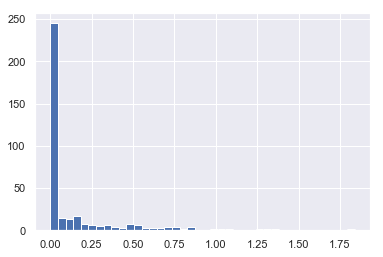

In [9]:
plt.hist(inches, 40);

This gives the idea that most days, predictably, it didn't rain.  

Now, how can we uncover more information on the days when it did indeed rain? For example, the avg precipitation, or in how many days the precipitation was more than a certain amount?  

It is here that we can use  ufuncs to do element-wise **comparisons** over arrays.

### Comparison Operators as <code>ufuncs</code>

NumPy has the same set of 6 comparison operators available in Python. The result of these operations is always an array with a Boolean data type.  

Here is one example for each of the operators:

In [12]:
x = np.array([1, 2, 3, 4, 5])

In [13]:
x < 4 # less than

array([ True,  True,  True, False, False])

In [14]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [16]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [17]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [18]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [19]:
x == 3  # equal

array([False, False,  True, False, False])

Compound expressions are also available:

In [20]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As with arithmetic operators, under the hood NumPy uses <code>ufuncs</code>:

<pre>
== 	np.equal 
!= 	np.not_equal
< 	 np.less 
<= 	np.less_equal
> 	 np.greater
>= 	np.greater_equal
</pre>

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape.

### Applications of comparison operators

In [22]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Counting

In [23]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [24]:
np.sum(x < 6) # +=1 if True

8

In [26]:
# how many values less than 6 in each row?
np.sum(x < 5, axis=1)

array([3, 1, 2])

In general, we can check if **any** or **all** the values are true, using _[drum roll ... ]_ <code>any</code> and <code>all</code>!

In [30]:
# are there any values greater than 8?
np.any(x > 8)

True

In [28]:
# are there any values less than zero?
np.any(x < 0)

False

In [31]:
np.all(x < 8, axis=1) # also along a specific axis

array([ True, False,  True])

### Boolean Operators

As seen before, NumPy offers its **bitwise logic operators** (& | ^ and ~) syntax following standard Python. 

<pre>
& 	np.bitwise_and 
| 	np.bitwise_or
^ 	np.bitwise_xor
~ 	np.bitwise_not
</pre>

**Note**: When using & and | on integers, the expression operates on the bits of the element, applying the _and_ or the _or_ to the _individual bits_ making up the number.  

That's why, for Boolean NumPy arrays, using & and | is nearly always the desired operation.

Back to our Seattle rain data:

In [32]:
np.sum((inches > 0.5) & (inches < 1))

29

In [34]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


### Boolean Arrays as Masks

A powerful feature is to use Boolean masks, i.e. selecting particular subset of an array according to specific conditions.

Using our simple array:

In [35]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [36]:
x[x < 5] # select values according to the condition (i.e. masking)

array([0, 3, 3, 3, 2, 4])

This way, we can esily operate on subsets of interest (e.g. seasons): 

In [37]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
